# Heart Disease Prediction

- DataSet Features
1. id (Unique id for each patient)
2. age (Age of the patient in years)
3. origin (place of study)
4. sex (Male/Female)
5. cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
6. trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
7. chol (serum cholesterol in mg/dl)
8. fbs (if fasting blood sugar > 120 mg/dl)
9. restecg (resting electrocardiographic results)
-- Values: [normal, stt abnormality, lv hypertrophy]
10. thalach: maximum heart rate achieved
11. exang: exercise-induced angina (True/ False)
12. oldpeak: ST depression induced by exercise relative to rest
13. slope: the slope of the peak exercise ST segment
14. ca: number of major vessels (0-3) colored by fluoroscopy
15. thal: [normal; fixed defect; reversible defect]
16. num: the predicted attribute

# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset

In [2]:
df = pd.read_csv("heart_disease_uci.csv")
df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


# Checking For the Null Values

In [4]:
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

# Taking Sex Column For Label Encoding As there is No null value No need of imputations

In [5]:
df['sex'].value_counts()

sex
Male      726
Female    194
Name: count, dtype: int64

# Label Encoding for the Sex column

1 to male
0 to female

In [6]:
from sklearn.preprocessing import LabelEncoder
encoder_sex = LabelEncoder()

df['sex'] = encoder_sex.fit_transform(df['sex'])

In [7]:
df['sex'].value_counts()

sex
1    726
0    194
Name: count, dtype: int64

In [8]:
df.info()

# Now the Sex Column has been converted into numerical column in which 1 represents male and 0 represents female

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    int64  
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(4), object(7)
memory usage: 115.1+ KB


# Going for the Dataset Column

In [9]:
df['dataset'].value_counts()

dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64

# Changing the name of column

In [10]:
df.columns = df.columns.str.replace('dataset','origin')
df.columns

Index(['id', 'age', 'sex', 'origin', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

# Label Encoding for the Origin Column
0 to Cleveland  
1 to Hungary        
2 to VA Long Beach     
3 to Switzerland
      

In [11]:
encoder_origin = LabelEncoder()

df['origin'] = encoder_origin.fit_transform(df['origin'])
df['origin'].value_counts()

origin
0    304
1    293
3    200
2    123
Name: count, dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    int64  
 3   origin    920 non-null    int64  
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(5), object(6)
memory usage: 115.1+ KB


# Going For CP (Chest Pain)

In [13]:
df['cp'].value_counts()

cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64

# Label Encoding for Cp

0 to asymptomatic  
1 to atypical angina  
2 to non-anginal  
3 to typical angina  

In [14]:
encoder_cp = LabelEncoder()

df['cp'] = encoder_cp.fit_transform(df['cp'])
df['cp'].value_counts()

cp
0    496
2    204
1    174
3     46
Name: count, dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    int64  
 3   origin    920 non-null    int64  
 4   cp        920 non-null    int64  
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(6), object(5)
memory usage: 115.1+ KB


# Trestbps

- It is the blood pressure when the patient is resting in the hospital
- Normal Range (120/80mm Hg)

In [16]:
df[df['trestbps'].isnull()]

,id,age,sex,origin,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
393,394,48,0,1,1,NaN,308.0,False,st-t abnormality,NaN,NaN,2.0,upsloping,NaN,NaN,0
599,600,35,1,2,0,NaN,0.0,NaN,normal,130.0,True,NaN,NaN,NaN,reversable defect,3
714,715,69,1,2,0,NaN,0.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,reversable defect,3
733,734,63,1,3,2,NaN,0.0,False,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,1
743,744,74,1,3,2,NaN,0.0,False,normal,NaN,NaN,NaN,NaN,NaN,NaN,0
746,747,51,1,3,0,NaN,0.0,True,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,2
749,750,55,1,3,2,NaN,228.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,3
750,751,54,1,3,0,NaN,0.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,3
756,757,60,1,3,0,NaN,281.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,2
758,759,58,1,3,0,NaN,203.0,True,normal,NaN,NaN,NaN,NaN,NaN,NaN,1


In [17]:
df['trestbps'].unique()

array([145., 160., 120., 130., 140., 172., 150., 110., 132., 117., 135.,
       112., 105., 124., 125., 142., 128., 170., 155., 104., 180., 138.,
       108., 134., 122., 115., 118., 100., 200.,  94., 165., 102., 152.,
       101., 126., 174., 148., 178., 158., 192., 129., 144., 123., 136.,
       146., 106., 156., 154., 114., 164.,  98., 190.,  nan, 113.,  92.,
        95.,  80., 185., 116.,   0.,  96., 127.])

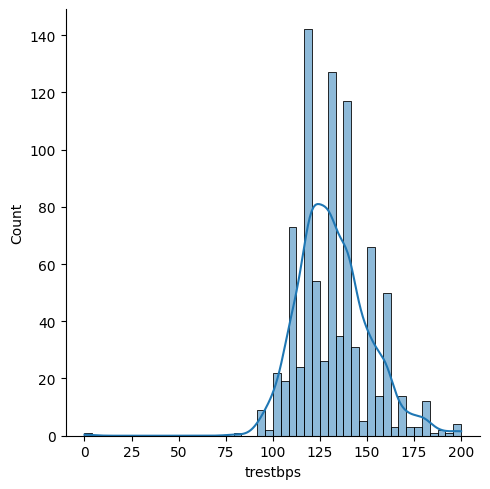

In [18]:
sns.displot(df['trestbps'],kde = True)

<Axes: ylabel='trestbps'>

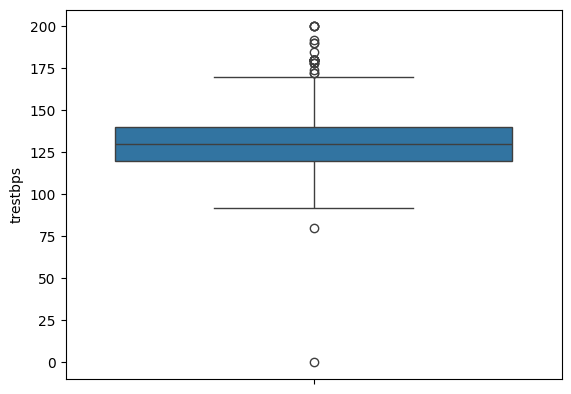

In [19]:
sns.boxplot(df['trestbps'])

# Observation
- As the data is not normally distributed it is left skwed and there are outliers we need to do median value imputations for the trestbps

# Removing the Nan Values by the medain

In [20]:
np.where(df['trestbps'].isna())

(array([393, 599, 714, 733, 743, 746, 749, 750, 756, 758, 762, 764, 768,
        771, 777, 778, 780, 788, 789, 792, 797, 807, 809, 814, 816, 829,
        830, 831, 832, 833, 834, 835, 839, 840, 844, 849, 853, 856, 857,
        861, 862, 864, 865, 867, 869, 875, 878, 879, 880, 881, 883, 884,
        887, 888, 894, 901, 905, 916, 918]),)

In [21]:
medain_bps = df['trestbps'].median()
medain_bps

np.float64(130.0)

In [22]:
df['trestbps'].fillna(medain_bps , inplace=True)
df['trestbps'].isna().sum()

C:\Users\Admin\AppData\Local\Temp\ipykernel_23156\4150916280.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['trestbps'].fillna(medain_bps , inplace=True)


np.int64(0)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    int64  
 3   origin    920 non-null    int64  
 4   cp        920 non-null    int64  
 5   trestbps  920 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(6), object(5)
memory usage: 115.1+ KB


# Cholestrol Column

In [24]:
df['chol'].isnull().sum()

np.int64(30)

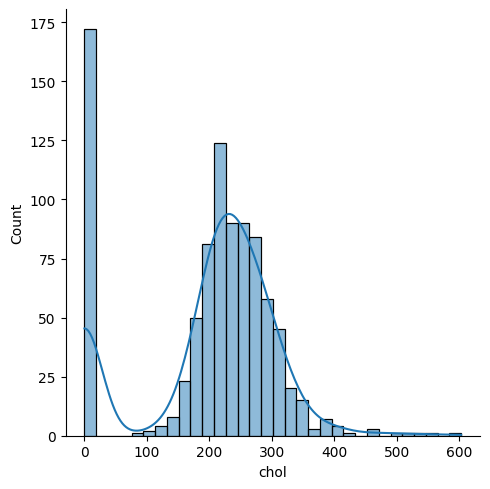

In [25]:
sns.displot(df['chol'],kde = True)

<Axes: ylabel='chol'>

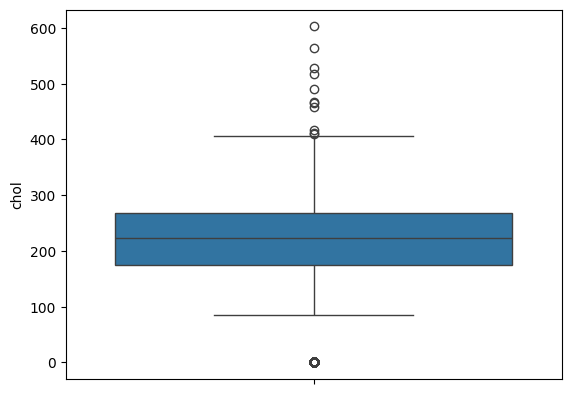

In [26]:
sns.boxplot(df['chol'])

# This has the Outliers so we need to put medain imputations

In [27]:
df['chol'].unique()

array([233., 286., 229., 250., 204., 236., 268., 354., 254., 203., 192.,
       294., 256., 263., 199., 168., 239., 275., 266., 211., 283., 284.,
       224., 206., 219., 340., 226., 247., 167., 230., 335., 234., 177.,
       276., 353., 243., 225., 302., 212., 330., 175., 417., 197., 198.,
       290., 253., 172., 273., 213., 305., 216., 304., 188., 282., 185.,
       232., 326., 231., 269., 267., 248., 360., 258., 308., 245., 270.,
       208., 264., 321., 274., 325., 235., 257., 164., 141., 252., 255.,
       201., 222., 260., 182., 303., 265., 309., 307., 249., 186., 341.,
       183., 407., 217., 288., 220., 209., 227., 261., 174., 281., 221.,
       205., 240., 289., 318., 298., 564., 246., 322., 299., 300., 293.,
       277., 214., 207., 223., 160., 394., 184., 315., 409., 244., 195.,
       196., 126., 313., 259., 200., 262., 215., 228., 193., 271., 210.,
       327., 149., 295., 306., 178., 237., 218., 242., 319., 166., 180.,
       311., 278., 342., 169., 187., 157., 176., 24

In [28]:
medain_chol = df['chol'].median()
medain_chol

np.float64(223.0)

In [29]:
df['chol'] = df['chol'].fillna(medain_chol)

In [30]:
df['chol'].isna().sum()

np.int64(0)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    int64  
 3   origin    920 non-null    int64  
 4   cp        920 non-null    int64  
 5   trestbps  920 non-null    float64
 6   chol      920 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(6), object(5)
memory usage: 115.1+ KB


# Fbs Column

In [32]:
df['fbs'].value_counts()

fbs
False    692
True     138
Name: count, dtype: int64

In [33]:
df['fbs'].isnull().sum()

np.int64(90)

# Observation 
- Now this is an Categorical Column we need to do Modal value Imputation

In [34]:
df['fbs'] = df['fbs'].fillna(df['fbs'].mode()[0])
df['fbs'].isna().sum()

C:\Users\Admin\AppData\Local\Temp\ipykernel_23156\761484465.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['fbs'] = df['fbs'].fillna(df['fbs'].mode()[0])


np.int64(0)

In [35]:
df['fbs'].value_counts()

fbs
False    782
True     138
Name: count, dtype: int64

# Now Doing Label Encoding for fbs

In [36]:
encoder_fbs = LabelEncoder()

df['fbs'] = encoder_fbs.fit_transform(df['fbs'])
df['fbs'].value_counts()

fbs
0    782
1    138
Name: count, dtype: int64

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    int64  
 3   origin    920 non-null    int64  
 4   cp        920 non-null    int64  
 5   trestbps  920 non-null    float64
 6   chol      920 non-null    float64
 7   fbs       920 non-null    int64  
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(7), object(4)
memory usage: 115.1+ KB


# Restecg Column

In [38]:
df['restecg'].value_counts()

restecg
normal              551
lv hypertrophy      188
st-t abnormality    179
Name: count, dtype: int64

In [39]:
df['restecg'].isnull().sum()

np.int64(2)

In [40]:
df[df['restecg'].isnull()]

,id,age,sex,origin,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
571,572,55,1,1,3,140.0,295.0,0,NaN,136.0,False,0.0,NaN,NaN,NaN,1
598,599,34,1,2,0,115.0,0.0,0,NaN,154.0,False,0.2,upsloping,NaN,NaN,1


# Mode Imputation
- Again it is an Categorical column

In [41]:
df['restecg'] = df['restecg'].fillna(df['restecg'].mode()[0])
df['restecg'].isnull().sum()

np.int64(0)

# Label Encoding
1 to normal  
0 to lv hypertrophy  
2 to st-t abnormality  

In [42]:
encoder_restecg = LabelEncoder()

df['restecg'] = encoder_restecg.fit_transform(df['restecg'])
df['restecg'].value_counts()

restecg
1    553
0    188
2    179
Name: count, dtype: int64

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    int64  
 3   origin    920 non-null    int64  
 4   cp        920 non-null    int64  
 5   trestbps  920 non-null    float64
 6   chol      920 non-null    float64
 7   fbs       920 non-null    int64  
 8   restecg   920 non-null    int64  
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(8), object(3)
memory usage: 115.1+ KB


# Thalch column
- Maximum Heart Rate Achieve

In [44]:
df['thalch'].isnull().sum()

np.int64(55)

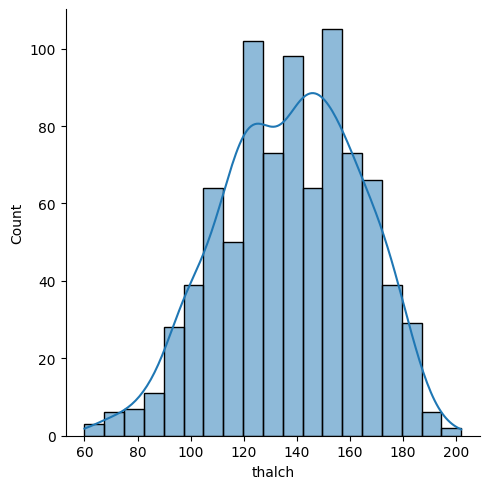

In [45]:
sns.displot(df['thalch'],kde = True)

<Axes: ylabel='thalch'>

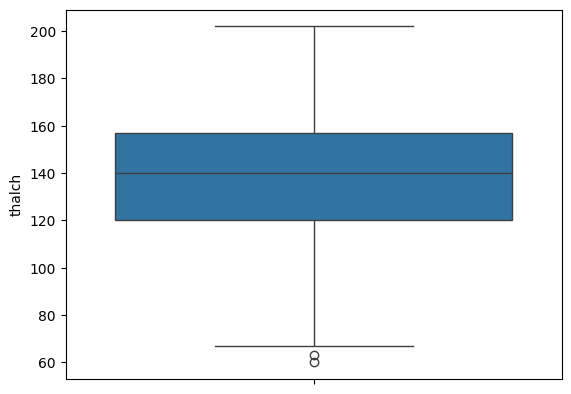

In [46]:
sns.boxplot(df['thalch'])

In [47]:
df['thalch'] =  df['thalch'].fillna(df['thalch'].mean())
df['thalch'].isnull().sum()

np.int64(0)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    int64  
 3   origin    920 non-null    int64  
 4   cp        920 non-null    int64  
 5   trestbps  920 non-null    float64
 6   chol      920 non-null    float64
 7   fbs       920 non-null    int64  
 8   restecg   920 non-null    int64  
 9   thalch    920 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(8), object(3)
memory usage: 115.1+ KB


 # exang column

In [49]:
df['exang'].isnull().sum()

np.int64(55)

# Mode imputation

In [50]:
df['exang'] = df['exang'].fillna(df['exang'].mode()[0])
df['exang'].isnull().sum()

C:\Users\Admin\AppData\Local\Temp\ipykernel_23156\1495056643.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['exang'] = df['exang'].fillna(df['exang'].mode()[0])


np.int64(0)

In [51]:
df['exang'].value_counts()

exang
False    583
True     337
Name: count, dtype: int64

In [52]:
encoder_exang = LabelEncoder()

df['exang'] = encoder_exang.fit_transform(df['exang'])
df['exang'].value_counts()

exang
0    583
1    337
Name: count, dtype: int64

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    int64  
 3   origin    920 non-null    int64  
 4   cp        920 non-null    int64  
 5   trestbps  920 non-null    float64
 6   chol      920 non-null    float64
 7   fbs       920 non-null    int64  
 8   restecg   920 non-null    int64  
 9   thalch    920 non-null    float64
 10  exang     920 non-null    int64  
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(9), object(2)
memory usage: 115.1+ KB


# Oldpeak Column

In [54]:
df['oldpeak'].isnull().sum()

np.int64(62)

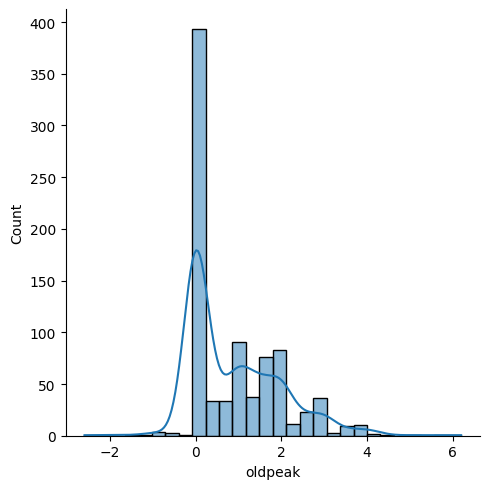

In [55]:
sns.displot(df['oldpeak'],kde = True)

<Axes: ylabel='oldpeak'>

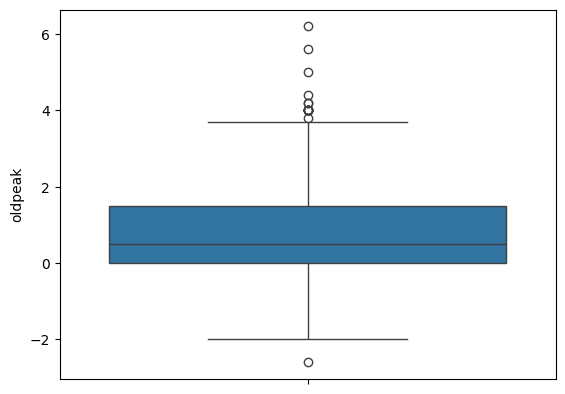

In [56]:
sns.boxplot(df['oldpeak'])

# Observation
- Right Skewed Distribution
- Outliers

Medain Imputation

In [57]:
df['oldpeak'] = df['oldpeak'].fillna(df['oldpeak'].median())
df['oldpeak'].isnull().sum()

np.int64(0)

In [58]:
df['oldpeak'].unique()

array([ 2.3,  1.5,  2.6,  3.5,  1.4,  0.8,  3.6,  0.6,  3.1,  0.4,  1.3,
        0. ,  0.5,  1.6,  1. ,  1.2,  0.2,  1.8,  3.2,  2.4,  2. ,  2.5,
        2.2,  2.8,  3. ,  3.4,  6.2,  4. ,  5.6,  2.9,  0.1,  2.1,  1.9,
        4.2,  0.9,  1.1,  3.8,  0.7,  0.3,  4.4,  5. , -1.1, -1.5, -0.1,
       -2.6, -0.7, -2. , -1. ,  1.7, -0.8, -0.5, -0.9,  3.7])

In [59]:
df['oldpeak'].median()

np.float64(0.5)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    int64  
 3   origin    920 non-null    int64  
 4   cp        920 non-null    int64  
 5   trestbps  920 non-null    float64
 6   chol      920 non-null    float64
 7   fbs       920 non-null    int64  
 8   restecg   920 non-null    int64  
 9   thalch    920 non-null    float64
 10  exang     920 non-null    int64  
 11  oldpeak   920 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(9), object(2)
memory usage: 115.1+ KB


# Slope Column

In [61]:
df['slope'].value_counts(normalize=True)

slope
flat           0.564648
upsloping      0.332242
downsloping    0.103110
Name: proportion, dtype: float64

In [62]:
df[df['slope'].isnull()]

,id,age,sex,origin,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
303,304,28,1,0,1,130.0,132.0,0,0,185.000000,0,0.0,NaN,NaN,NaN,0
304,305,29,1,1,1,120.0,243.0,0,1,160.000000,0,0.0,NaN,NaN,NaN,0
305,306,29,1,1,1,140.0,223.0,0,1,170.000000,0,0.0,NaN,NaN,NaN,0
306,307,30,0,1,3,170.0,237.0,0,2,170.000000,0,0.0,NaN,NaN,fixed defect,0
307,308,31,0,1,1,100.0,219.0,0,2,150.000000,0,0.0,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,0,3,0,127.0,333.0,1,2,154.000000,0,0.0,NaN,NaN,NaN,1
916,917,62,1,3,3,130.0,139.0,0,2,137.545665,0,0.5,NaN,NaN,NaN,0
917,918,55,1,3,0,122.0,223.0,1,2,100.000000,0,0.0,NaN,NaN,fixed defect,2
918,919,58,1,3,0,130.0,385.0,1,0,137.545665,0,0.5,NaN,NaN,NaN,0


In [63]:
df.shape

(920, 16)

# Observation

- 34% percent of the slope column is empty so we will drop it instead of Mode Imputations

In [64]:
df.drop('slope',axis=1 ,inplace=True)
df

,id,age,sex,origin,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,ca,thal,num
0,1,63,1,0,3,145.0,233.0,1,0,150.000000,0,2.3,0.0,fixed defect,0
1,2,67,1,0,0,160.0,286.0,0,0,108.000000,1,1.5,3.0,normal,2
2,3,67,1,0,0,120.0,229.0,0,0,129.000000,1,2.6,2.0,reversable defect,1
3,4,37,1,0,2,130.0,250.0,0,1,187.000000,0,3.5,0.0,normal,0
4,5,41,0,0,1,130.0,204.0,0,0,172.000000,0,1.4,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,0,3,0,127.0,333.0,1,2,154.000000,0,0.0,NaN,NaN,1
916,917,62,1,3,3,130.0,139.0,0,2,137.545665,0,0.5,NaN,NaN,0
917,918,55,1,3,0,122.0,223.0,1,2,100.000000,0,0.0,NaN,fixed defect,2
918,919,58,1,3,0,130.0,385.0,1,0,137.545665,0,0.5,NaN,NaN,0


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    int64  
 3   origin    920 non-null    int64  
 4   cp        920 non-null    int64  
 5   trestbps  920 non-null    float64
 6   chol      920 non-null    float64
 7   fbs       920 non-null    int64  
 8   restecg   920 non-null    int64  
 9   thalch    920 non-null    float64
 10  exang     920 non-null    int64  
 11  oldpeak   920 non-null    float64
 12  ca        309 non-null    float64
 13  thal      434 non-null    object 
 14  num       920 non-null    int64  
dtypes: float64(5), int64(9), object(1)
memory usage: 107.9+ KB


# Ca column

In [66]:
df['ca'].isnull().sum()

np.int64(611)

# Observation
- More than 67% Data is nan , hence dropping the column

In [67]:
df.drop('ca',axis = True , inplace=True)
df

,id,age,sex,origin,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,thal,num
0,1,63,1,0,3,145.0,233.0,1,0,150.000000,0,2.3,fixed defect,0
1,2,67,1,0,0,160.0,286.0,0,0,108.000000,1,1.5,normal,2
2,3,67,1,0,0,120.0,229.0,0,0,129.000000,1,2.6,reversable defect,1
3,4,37,1,0,2,130.0,250.0,0,1,187.000000,0,3.5,normal,0
4,5,41,0,0,1,130.0,204.0,0,0,172.000000,0,1.4,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,0,3,0,127.0,333.0,1,2,154.000000,0,0.0,NaN,1
916,917,62,1,3,3,130.0,139.0,0,2,137.545665,0,0.5,NaN,0
917,918,55,1,3,0,122.0,223.0,1,2,100.000000,0,0.0,fixed defect,2
918,919,58,1,3,0,130.0,385.0,1,0,137.545665,0,0.5,NaN,0


# thal Column

In [68]:
df['thal'].value_counts()

thal
normal               196
reversable defect    192
fixed defect          46
Name: count, dtype: int64

In [69]:
df['thal'].isnull().sum()

np.int64(486)

# Observation
- Again More than 52% data is nan , hence dropping the column

In [70]:
df.drop('thal',axis = 1 , inplace= True)

# Cleaned Dataset

In [71]:
df

,id,age,sex,origin,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,num
0,1,63,1,0,3,145.0,233.0,1,0,150.000000,0,2.3,0
1,2,67,1,0,0,160.0,286.0,0,0,108.000000,1,1.5,2
2,3,67,1,0,0,120.0,229.0,0,0,129.000000,1,2.6,1
3,4,37,1,0,2,130.0,250.0,0,1,187.000000,0,3.5,0
4,5,41,0,0,1,130.0,204.0,0,0,172.000000,0,1.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,0,3,0,127.0,333.0,1,2,154.000000,0,0.0,1
916,917,62,1,3,3,130.0,139.0,0,2,137.545665,0,0.5,0
917,918,55,1,3,0,122.0,223.0,1,2,100.000000,0,0.0,2
918,919,58,1,3,0,130.0,385.0,1,0,137.545665,0,0.5,0


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    int64  
 3   origin    920 non-null    int64  
 4   cp        920 non-null    int64  
 5   trestbps  920 non-null    float64
 6   chol      920 non-null    float64
 7   fbs       920 non-null    int64  
 8   restecg   920 non-null    int64  
 9   thalch    920 non-null    float64
 10  exang     920 non-null    int64  
 11  oldpeak   920 non-null    float64
 12  num       920 non-null    int64  
dtypes: float64(4), int64(9)
memory usage: 93.6 KB


In [73]:
df.isnull().sum()

id          0
age         0
sex         0
origin      0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
num         0
dtype: int64

# Note
- As we are going to do binary classfication, So we will take only 2 classes.
1. Patient Has the Heart Disease 
2. Patient Do not have the Heart Disease

In [74]:
df['num'].value_counts()

num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64

In [75]:
df['num'] = np.where(df['num'].between(1,4),1,0)
df['num'].value_counts()

num
1    509
0    411
Name: count, dtype: int64

In [76]:
df.columns = df.columns.str.replace('num','disease')
df

,id,age,sex,origin,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,disease
0,1,63,1,0,3,145.0,233.0,1,0,150.000000,0,2.3,0
1,2,67,1,0,0,160.0,286.0,0,0,108.000000,1,1.5,1
2,3,67,1,0,0,120.0,229.0,0,0,129.000000,1,2.6,1
3,4,37,1,0,2,130.0,250.0,0,1,187.000000,0,3.5,0
4,5,41,0,0,1,130.0,204.0,0,0,172.000000,0,1.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,0,3,0,127.0,333.0,1,2,154.000000,0,0.0,1
916,917,62,1,3,3,130.0,139.0,0,2,137.545665,0,0.5,0
917,918,55,1,3,0,122.0,223.0,1,2,100.000000,0,0.0,1
918,919,58,1,3,0,130.0,385.0,1,0,137.545665,0,0.5,0


In [ ]:
df.to_csv('Cleaned_data.csv')

# Feature Selection

In [78]:
df.describe()

,id,age,sex,origin,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,disease
count,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000
mean,460.500000,53.510870,0.789130,1.238043,0.782609,131.995652,199.908696,0.150000,0.990217,137.545665,0.366304,0.853261,0.553261
std,265.725422,9.424685,0.408148,1.130673,0.956350,18.451300,109.040171,0.357266,0.631863,25.138494,0.482056,1.058049,0.497426
min,1.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000
25%,230.750000,47.000000,1.000000,0.000000,0.000000,120.000000,177.750000,0.000000,1.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,1.000000,1.000000,0.000000,130.000000,223.000000,0.000000,1.000000,138.000000,0.000000,0.500000,1.000000
75%,690.250000,60.000000,1.000000,2.000000,2.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,1.000000
max,920.000000,77.000000,1.000000,3.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,1.000000


In [79]:
df.corr()

,id,age,sex,origin,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,disease
id,1.000000,0.239301,0.280053,0.949062,-0.189430,0.039382,-0.370721,0.148983,0.479012,-0.436795,0.166239,0.014034,0.356086
age,0.239301,1.000000,0.056889,0.235076,-0.076519,0.230784,-0.086010,0.219915,-0.006652,-0.353471,0.160910,0.233550,0.282700
sex,0.280053,0.056889,1.000000,0.285734,-0.125933,-0.002145,-0.194029,0.075370,0.072160,-0.177135,0.155204,0.090794,0.307284
origin,0.949062,0.235076,0.285734,1.000000,-0.150334,0.008343,-0.410777,0.170110,0.460189,-0.382415,0.129326,0.012767,0.295696
cp,-0.189430,-0.076519,-0.125933,-0.150334,1.000000,-0.023980,0.065089,0.006370,-0.070150,0.289362,-0.360513,-0.177489,-0.385077
trestbps,0.039382,0.230784,-0.002145,0.008343,-0.023980,1.000000,0.089484,0.143709,0.010263,-0.104143,0.153835,0.161217,0.101273
chol,-0.370721,-0.086010,-0.194029,-0.410777,0.065089,0.089484,1.000000,0.089316,-0.199594,0.226203,-0.033914,0.047454,-0.228976
fbs,0.148983,0.219915,0.075370,0.170110,0.006370,0.143709,0.089316,1.000000,0.025788,-0.030271,-0.003475,0.034112,0.108071
restecg,0.479012,-0.006652,0.072160,0.460189,-0.070150,0.010263,-0.199594,0.025788,1.000000,-0.165651,0.026067,-0.047235,0.058783
thalch,-0.436795,-0.353471,-0.177135,-0.382415,0.289362,-0.104143,0.226203,-0.030271,-0.165651,1.000000,-0.349828,-0.147640,-0.382942


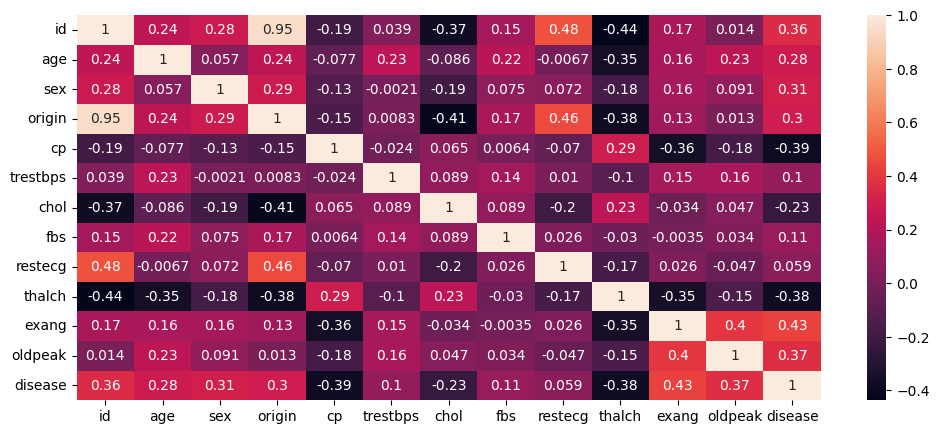

In [84]:
plt.figure(figsize=(12,5))
sns.heatmap(df.corr() , annot=True)
plt.show()

# Observation
- We can use all the features for training the model or
- The trestbps , fbs and restecg have very less correlation with target disease feature , so we can drop them


# Indpendent and Dependent Features

In [134]:
X = df.iloc[:,1:-1]
Y = df.iloc[:,-1]

In [135]:
X

,age,sex,origin,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak
0,63,1,0,3,145.0,233.0,1,0,150.000000,0,2.3
1,67,1,0,0,160.0,286.0,0,0,108.000000,1,1.5
2,67,1,0,0,120.0,229.0,0,0,129.000000,1,2.6
3,37,1,0,2,130.0,250.0,0,1,187.000000,0,3.5
4,41,0,0,1,130.0,204.0,0,0,172.000000,0,1.4
...,...,...,...,...,...,...,...,...,...,...,...
915,54,0,3,0,127.0,333.0,1,2,154.000000,0,0.0
916,62,1,3,3,130.0,139.0,0,2,137.545665,0,0.5
917,55,1,3,0,122.0,223.0,1,2,100.000000,0,0.0
918,58,1,3,0,130.0,385.0,1,0,137.545665,0,0.5


In [136]:
Y

0      0
1      1
2      1
3      0
4      0
      ..
915    1
916    0
917    1
918    0
919    1
Name: disease, Length: 920, dtype: int64

# Train Test Split

In [137]:
from sklearn.model_selection import train_test_split

X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.20 , random_state=0 , stratify=Y)

# Standardizing X

In [138]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train , X_test

(array([[-0.56756617, -1.92819831, -0.1977749 , ..., -1.08471403,
         -0.77684351, -0.8041079 ],
        [-0.35323641,  0.51861886, -0.1977749 , ...,  0.09635005,
          1.28726055, -0.8041079 ],
        [ 2.32588558,  0.51861886,  1.58826595, ..., -1.00597643,
          1.28726055,  2.00740476],
        ...,
        [ 0.07542311,  0.51861886, -0.1977749 , ...,  0.49003808,
          1.28726055,  0.60164843],
        [ 1.14707191,  0.51861886,  0.69524552, ..., -0.92723882,
          1.28726055,  0.41421425],
        [-1.42488521,  0.51861886, -0.1977749 , ...,  0.49003808,
         -0.77684351, -0.8041079 ]], shape=(736, 11)),
 array([[ 0.82557727,  0.51861886,  0.69524552, ..., -2.38388452,
         -0.77684351,  1.53881932],
        [ 0.18258799,  0.51861886,  1.58826595, ..., -0.41544439,
          1.28726055,  0.78908261],
        [-1.74637985, -1.92819831, -0.1977749 , ...,  0.17508765,
         -0.77684351, -0.8041079 ],
        ...,
        [-0.88906081,  0.51861886, -1

# Model Training

In [139]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(X_train , Y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


# Predictions

In [140]:
Y_pred_test = logreg.predict(X_test)
Y_pred_test

array([1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1])

# Predictions

In [141]:
logreg.predict_proba(X_test)

array([[0.02412638, 0.97587362],
       [0.04547817, 0.95452183],
       [0.95188866, 0.04811134],
       [0.08791583, 0.91208417],
       [0.25015812, 0.74984188],
       [0.86921419, 0.13078581],
       [0.8772696 , 0.1227304 ],
       [0.05413169, 0.94586831],
       [0.86295181, 0.13704819],
       [0.01458525, 0.98541475],
       [0.4988186 , 0.5011814 ],
       [0.12981659, 0.87018341],
       [0.01087588, 0.98912412],
       [0.92071855, 0.07928145],
       [0.68236407, 0.31763593],
       [0.74066067, 0.25933933],
       [0.67917326, 0.32082674],
       [0.13585552, 0.86414448],
       [0.86543546, 0.13456454],
       [0.04325605, 0.95674395],
       [0.77444415, 0.22555585],
       [0.27297133, 0.72702867],
       [0.60951959, 0.39048041],
       [0.01573417, 0.98426583],
       [0.02352744, 0.97647256],
       [0.97245243, 0.02754757],
       [0.06765111, 0.93234889],
       [0.67928651, 0.32071349],
       [0.22645602, 0.77354398],
       [0.69969171, 0.30030829],
       [0.

# Performance Matrics On Test Data

In [142]:
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report

score = accuracy_score(Y_test , Y_pred_test)
cm = confusion_matrix(Y_test , Y_pred_test)
cr = classification_report(Y_test , Y_pred_test)

print(score)
print(cm)
print(cr)

0.8152173913043478
[[67 15]
 [19 83]]
              precision    recall  f1-score   support

           0       0.78      0.82      0.80        82
           1       0.85      0.81      0.83       102

    accuracy                           0.82       184
   macro avg       0.81      0.82      0.81       184
weighted avg       0.82      0.82      0.82       184



# Performance Matric on Train Data

In [143]:
Y_pred_train = logreg.predict(X_train)

score = accuracy_score(Y_train , Y_pred_train)
cm = confusion_matrix(Y_train , Y_pred_train)
cr = classification_report(Y_train , Y_pred_train)

print(score)
print(cm)
print(cr)


0.8125
[[258  71]
 [ 67 340]]
              precision    recall  f1-score   support

           0       0.79      0.78      0.79       329
           1       0.83      0.84      0.83       407

    accuracy                           0.81       736
   macro avg       0.81      0.81      0.81       736
weighted avg       0.81      0.81      0.81       736



In [149]:
model_dummy = [0 for _ in range(len(X_test))]
model_dummy

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [ ]:
model_prob = logreg.predict_proba(X_test)[:,1]
model_prob

array([0.97587362, 0.95452183, 0.04811134, 0.91208417, 0.74984188,
       0.13078581, 0.1227304 , 0.94586831, 0.13704819, 0.98541475,
       0.5011814 , 0.87018341, 0.98912412, 0.07928145, 0.31763593,
       0.25933933, 0.32082674, 0.86414448, 0.13456454, 0.95674395,
       0.22555585, 0.72702867, 0.39048041, 0.98426583, 0.97647256,
       0.02754757, 0.93234889, 0.32071349, 0.77354398, 0.30030829,
       0.0991184 , 0.37544742, 0.85146919, 0.92304704, 0.90359991,
       0.90096629, 0.38210648, 0.72781928, 0.34462172, 0.89543267,
       0.895915  , 0.97857858, 0.20706905, 0.15823008, 0.07190975,
       0.49224499, 0.2331649 , 0.83714969, 0.40689906, 0.75818652,
       0.0641884 , 0.88029045, 0.27233024, 0.27829973, 0.92756066,
       0.41568783, 0.87359373, 0.95819545, 0.72087235, 0.87226871,
       0.8789343 , 0.96801089, 0.38262793, 0.6559709 , 0.8522054 ,
       0.17092227, 0.18946217, 0.11541819, 0.66050137, 0.73584815,
       0.45881272, 0.18053648, 0.11111788, 0.05156229, 0.27369

# AUC Score

In [150]:
from sklearn.metrics import roc_auc_score , roc_curve

score_dum = roc_auc_score(Y_test,model_dummy)
score_auc = roc_auc_score(Y_test , model_prob)

print("The Dummy Model AUC =",score_dum)
print("The Logistic Regression Model AUC =",score_auc)

The Dummy Model AUC = 0.5
The Logistic Regression Model AUC = 0.8781683405069345


# ROC Curve

In [151]:
dummy_fpr , dummy_tpr , dummy_threshold = roc_curve(Y_test , model_dummy)
model_fpr , model_tpr , model_threshold = roc_curve(Y_test , model_prob)

# Plotting the ROC

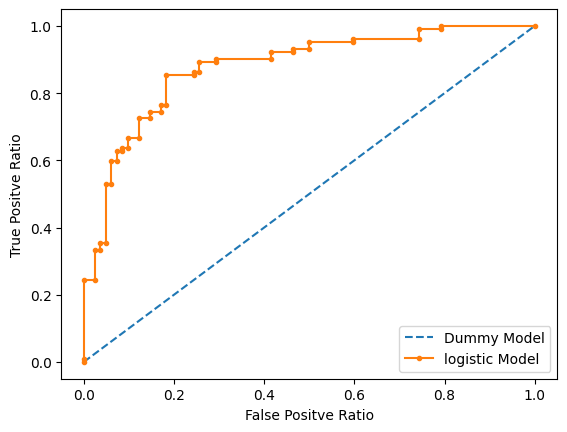

In [152]:
from matplotlib import pyplot

pyplot.plot(dummy_fpr , dummy_tpr , linestyle = '--' , label = 'Dummy Model')
pyplot.plot(model_fpr , model_tpr , marker = '.' , label = 'logistic Model')

pyplot.xlabel("False Positve Ratio")
pyplot.ylabel("True Positve Ratio")

pyplot.legend()

pyplot.show()

# HyperParameter Tuning

- Parameters And Estimator

In [153]:
model =  LogisticRegression()

penalty = ['l1','l2','elasticnet']
c_values = [100,10,1,0.1,0.01]
solver = ['newton-cg','lbfgs','sag','saga','liblinear']

params = dict(penalty = penalty , C = c_values , solver = solver)

# GridSearchCV Performance

In [162]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(5)

# Model Selection
grid = GridSearchCV(estimator=model , param_grid=params ,cv = cv , n_jobs= -1 , scoring = 'accuracy')

# Model Training
grid.fit(X_train , Y_train)

# Best Score and Parameter
print(grid.best_score_)
print(grid.best_params_)

# Predictions
Y_pred_grid_test = grid.predict(X_test)

# Performance Matrix
score_grid = accuracy_score(Y_test,Y_pred_grid_test)
matrix_grid = confusion_matrix(Y_test,Y_pred_grid_test)
report_grid = classification_report(Y_test,Y_pred_grid_test)
print("The Accuracy =",score_grid)
print(matrix_grid)
print(report_grid)

0.7962493105350248
{'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
The Accuracy = 0.8206521739130435
[[66 16]
 [17 85]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        82
           1       0.84      0.83      0.84       102

    accuracy                           0.82       184
   macro avg       0.82      0.82      0.82       184
weighted avg       0.82      0.82      0.82       184



c:\Users\Admin\Desktop\Data Science\venv_newpy\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
200 fits failed out of a total of 375.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Admin\Desktop\Data Science\venv_newpy\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Admin\Desktop\Data Science\venv_newpy\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Admin\Desktop\Data Science\venv_ne

# RandomizedCV Performance

In [160]:
from sklearn.model_selection import RandomizedSearchCV

# Model Search
rand = RandomizedSearchCV(estimator= model , param_distributions=params , cv = 5 , scoring='accuracy' , n_jobs= -1 , n_iter= 30)

# Model Training
rand.fit(X_train,Y_train)

# Best Score And parameter
print(rand.best_score_)
print(rand.best_params_)

# Predictions
Y_pred_rand_test = rand.predict(X_test)

# Performance Matrics
score_rand = accuracy_score(Y_test,Y_pred_rand_test)
matrix_rand = confusion_matrix(Y_test,Y_pred_rand_test)
report_rand = classification_report(Y_test,Y_pred_rand_test)
print("The Accuracy =", score_rand)
print(matrix_rand)
print(report_rand)

0.7962493105350248
{'solver': 'lbfgs', 'penalty': 'l2', 'C': 0.01}
The Accuracy = 0.8206521739130435
[[66 16]
 [17 85]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        82
           1       0.84      0.83      0.84       102

    accuracy                           0.82       184
   macro avg       0.82      0.82      0.82       184
weighted avg       0.82      0.82      0.82       184



c:\Users\Admin\Desktop\Data Science\venv_newpy\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
65 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Admin\Desktop\Data Science\venv_newpy\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Admin\Desktop\Data Science\venv_newpy\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Admin\Desktop\Data Science\venv_new

# Model Storing

In [163]:
import pickle

pickle.dump(grid , open("heart_disease_model.pkl" , 'wb'))